[View in Colaboratory](https://colab.research.google.com/github/ckbjimmy/2018_mlw/blob/master/nb3_nn.ipynb)

# Machine Learning for Clinical Predictive Analytics

We would like to introduce the basic knowledge of machine learning and toolkits for clinical knowledge discovery in the workshop.
The material will cover common classification and clustering algorithms for clinical prediction tasks, as well as the diagnostic workflow of applying machine learning to real-world problems. 
We will use [Google colab](https://colab.research.google.com/) / python jupyter notebook and two datasets:

- Breast Cancer Wisconsin (Diagnostic) Database, and 
- pre-extracted ICU data from PhysioNet Database
  
to build predictive models.

The learning objectives of this workshop tutorial are:

- Learn how to use Google colab / jupyter notebook
- Learn how to build machine learning models for clinical classification and clustering tasks

To accelerate the progress without obstacles, we hope that the readers fulfill the following prerequisites:

- [Skillset] basic python syntax
- [Requirements] Google account OR [anaconda](https://anaconda.org/anaconda/python)

In part 1, we will go through the basic of modeling for classification.
In part 2, we will investigate more on unsupervised learning methods for clustering and visualization.
In part 3, we will play with neural networks.


# Part III – Deep learning / neural network

Deep learning is a group of machine learning algorithms that focuses on utilizing neural network architecture.
The neural network approach attempt to mimic the working of biological neurons by stacking layers of neuron units that can pass information.
The network will pass the inforamtion back and forth to adjust the weights of neuron units using backpropagation algorithm based on the objective function (loss function, criterion) that we provide.

To build the neural network without too much efforts in python, we adopt the high-level python deep learning API, keras, to train neural networks.

After going through this tutorial, we hope that you will understand

- how to use keras to design and build simple neural network for classification problems,
- how to evaluate the keras neural network models.

In this tutorial, we directly use the most complicated data, PhysioNet dataset, as an example to demonstrate the performance of deep learning models.

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/ckbjimmy/2018_mlw/master/data/PhysionetChallenge2012_data.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

Before training neural network, we need to do some transformations for our data.

In [0]:
X = Imputer(missing_values='NaN', strategy='mean', axis=0).fit(X).transform(X)
X = StandardScaler().fit(X).transform(X)

# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Next, we import keras modules and construct a three-layer neural network architecture.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In our first neural network model, we will construct the one that

- take the input and pass them into the 32-dimension first hidden layer, 
- take the output of the first layer and pass them into the 16-dimension second layer,
- take the output of the second layer and pass them into the last layer for prediction,
- the output of the last layer is the prediction.

In keras, we use `Sequential()` as the skeleton of the neural network model, and sequentially add the layer on it.
After building the layers, we need to compile the model and defined the optimizer, loss function and evaluation metrics to optimize our model.
In this example, we use the optimizer called `adam`, to minimize the value of loss function `binary_crossentropy` (if you work on the regression problem, remember to change to `mse`), and judge by accuracy.

Then, it's time to train the model!
Smaller batch size usually yields better performance, yet with slow speed.
The epoch size of $n$ means that the algorithm will go through whole dataset $n$ times.


In [52]:
# initialize neural network
clf = Sequential()

# first hidden layer for input data
clf.add(Dense(units=64, 
              kernel_initializer='uniform',
              activation='relu', 
              input_dim=X.shape[1]))

# second hidden layer
clf.add(Dense(units=8, 
              kernel_initializer='uniform', 
              activation='relu'))

# the last hidden layer for output
clf.add(Dense(units=1, 
              kernel_initializer='uniform', 
              activation='sigmoid'))

# compile the network
clf.compile(optimizer='adam', 
            loss='binary_crossentropy', 
            metrics=['accuracy'])


print(clf.summary())

# fit model
history = model.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=100,
                    epochs=20, 
                    verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 64)                11712     
_________________________________________________________________
dense_60 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 9         
Total params: 12,241
Trainable params: 12,241
Non-trainable params: 0
_________________________________________________________________
None
Train on 3200 samples, validate on 800 samples
Epoch 1/20
3200/3200 [==============================] - 1s 457us/step - loss: 0.6636 - acc: 0.8441 - val_loss: 0.6032 - val_acc: 0.8488
Epoch 2/20
3200/3200 [==============================] - 0s 38us/step - loss: 0.4700 - acc: 0.8647 - val_loss: 0.3862 - val_acc: 0.8488
Epoch 3/20
3200/3200 [==============================] - 0s 36us/step - loss: 0.

3200/3200 [==============================] - 0s 28us/step - loss: 0.2197 - acc: 0.9122 - val_loss: 0.3474 - val_acc: 0.8612
Epoch 17/20
3200/3200 [==============================] - 0s 31us/step - loss: 0.2123 - acc: 0.9163 - val_loss: 0.3522 - val_acc: 0.8575
Epoch 18/20
3200/3200 [==============================] - 0s 30us/step - loss: 0.2051 - acc: 0.9194 - val_loss: 0.3557 - val_acc: 0.8612
Epoch 19/20
3200/3200 [==============================] - 0s 32us/step - loss: 0.1954 - acc: 0.9238 - val_loss: 0.3621 - val_acc: 0.8525
Epoch 20/20
3200/3200 [==============================] - 0s 29us/step - loss: 0.1846 - acc: 0.9306 - val_loss: 0.3700 - val_acc: 0.8500


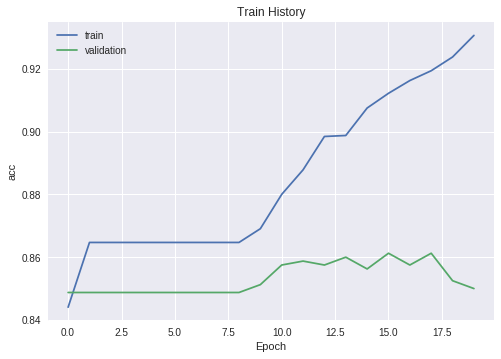

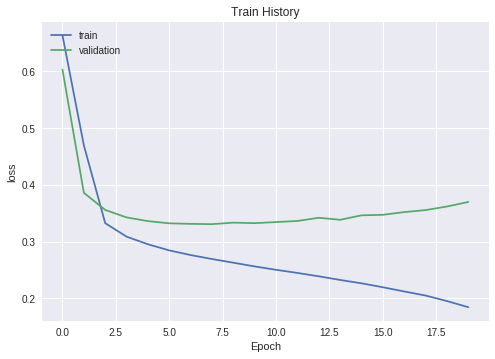

In [53]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])   
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
    
show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

In [54]:
# we use the trained model to predict the label of test set
y_pred = clf.predict(X_test)
y_pred = [1 if i[0] > 0.5 else 0 for i in y_pred]

# show the performance using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[637  42]
 [ 78  43]]


In [55]:
# we use pycm to show the performance
!pip install pycm
from pycm import *

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
print(cm)

Predict          0        1        
Actual
0                637      42       
1                78       43       




Overall Statistics : 

95% CI                                                           (0.82526,0.87474)
Bennett_S                                                        0.7
Chi-Squared                                                      None
Chi-Squared DF                                                   1
Conditional Entropy                                              None
Cramer_V                                                         None
Cross Entropy                                                    0.62676
Gwet_AC1                                                         0.80661
Joint Entropy                                                    None
KL Divergence                                                    0.0138
Kappa                                                            0.3344
Kappa 95% CI                                                     (0.2

## Exercise

Now try to play with the breast cancer dataset!

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_63 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
None
Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 1s 3ms/step - loss: 0.7127 - acc: 0.6286 - val_loss: 0.6978 - val_acc: 0.6228
Epoch 2/50
455/455 [==============================] - 0s 51us/step - loss: 0.6937 - acc: 0.6286 - val_loss: 0.6852 - val_acc: 0.8158
Epoch 3/50
455/455 [==============================] - 0s 44us/step - loss: 0.6835 - acc: 0.8

Epoch 21/50
455/455 [==============================] - 0s 44us/step - loss: 0.3045 - acc: 0.8945 - val_loss: 0.2007 - val_acc: 0.9474
Epoch 22/50
455/455 [==============================] - 0s 41us/step - loss: 0.2998 - acc: 0.8835 - val_loss: 0.1896 - val_acc: 0.9386
Epoch 23/50
455/455 [==============================] - 0s 44us/step - loss: 0.2988 - acc: 0.8879 - val_loss: 0.1941 - val_acc: 0.9561
Epoch 24/50
455/455 [==============================] - 0s 41us/step - loss: 0.2732 - acc: 0.8857 - val_loss: 0.1921 - val_acc: 0.9123
Epoch 25/50
455/455 [==============================] - 0s 43us/step - loss: 0.2696 - acc: 0.9033 - val_loss: 0.1813 - val_acc: 0.9561
Epoch 26/50
455/455 [==============================] - 0s 46us/step - loss: 0.2734 - acc: 0.8967 - val_loss: 0.1653 - val_acc: 0.9474
Epoch 27/50
455/455 [==============================] - 0s 48us/step - loss: 0.2745 - acc: 0.8967 - val_loss: 0.1668 - val_acc: 0.9298
Epoch 28/50
455/455 [==============================] - 0s 44us

Epoch 46/50
455/455 [==============================] - 0s 40us/step - loss: 0.2328 - acc: 0.9055 - val_loss: 0.1303 - val_acc: 0.9474
Epoch 47/50
455/455 [==============================] - 0s 43us/step - loss: 0.2351 - acc: 0.9077 - val_loss: 0.1305 - val_acc: 0.9561
Epoch 48/50
455/455 [==============================] - 0s 67us/step - loss: 0.2315 - acc: 0.9055 - val_loss: 0.1267 - val_acc: 0.9561
Epoch 49/50
455/455 [==============================] - 0s 48us/step - loss: 0.2311 - acc: 0.9055 - val_loss: 0.1259 - val_acc: 0.9649
Epoch 50/50
455/455 [==============================] - 0s 51us/step - loss: 0.2271 - acc: 0.9121 - val_loss: 0.1285 - val_acc: 0.9561


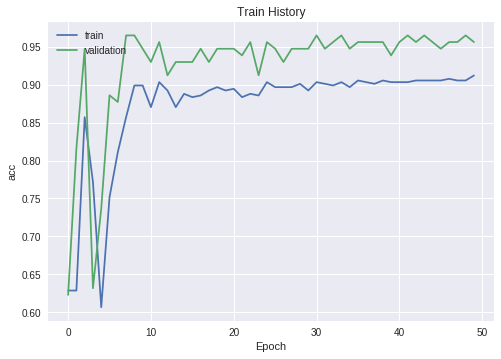

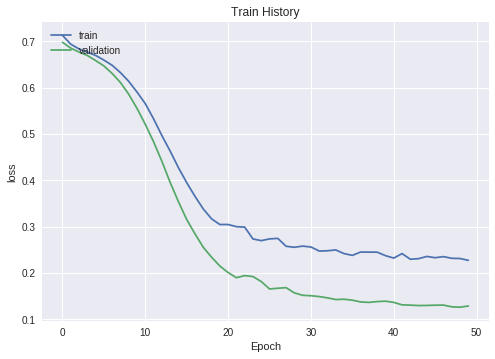

Predict          0        1        
Actual
0                38       5        
1                0        71       




Overall Statistics : 

95% CI                                                           (0.91855,0.99373)
Bennett_S                                                        0.91228
Chi-Squared                                                      None
Chi-Squared DF                                                   1
Conditional Entropy                                              None
Cramer_V                                                         None
Cross Entropy                                                    0.96216
Gwet_AC1                                                         0.91906
Joint Entropy                                                    None
KL Divergence                                                    0.00612
Kappa                                                            0.90446
Kappa 95% CI                                                   

In [56]:
from sklearn import datasets

df_bc = datasets.load_breast_cancer()
X = df_bc['data']
y = df_bc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = Sequential()
clf.add(Dense(units=16, 
              kernel_initializer='uniform',
              activation='relu', 
              input_dim=X.shape[1]))
clf.add(Dense(units=16, 
              kernel_initializer='uniform', 
              activation='relu'))
clf.add(Dense(units=1, 
              kernel_initializer='uniform', 
              activation='sigmoid'))
clf.compile(optimizer='adam', 
            loss='binary_crossentropy', 
            metrics=['accuracy'])
print(clf.summary())

history = model.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=100,
                    epochs=50, 
                    verbose=1)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

y_pred = clf.predict(X_test)
y_pred = [1 if i[0] > 0.5 else 0 for i in y_pred]

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred)
print(cm)

## Image

![mlp](https://3.bp.blogspot.com/-TpTfcbPRWWY/WVW-EUCKVLI/AAAAAAAAWuE/sn9sX6qMc38UePENvSmmgLH3bA7za-3ogCLcBGAs/s1600/3946_3.PNG)

[Source] http://nbviewer.jupyter.org/github/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/2.6-mnist-recognition-mlp.ipynb

In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28*28).astype('float32')
X_test = X_test.reshape(10000, 28*28).astype('float32')
  
X_train = X_train/255
X_test = X_test/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_66 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.4377 - acc: 0.8855 - val_loss: 0.2276 - val_acc: 0.9375
Epoch 2/10
 - 3s - loss: 0.1901 - acc: 0.9455 - val_loss: 0.1572 - val_acc: 0.9558
Epoch 3/10
 - 2s - loss: 0.1338 - acc: 0.9613 - val_loss: 0.1260 - val_acc: 0.9638
Epoch 4/10
 - 2s - loss: 0.1022 - acc: 0.9710 - val_loss: 0.1065 - val_acc: 0.9687
Epoch 5/10
 - 2s - loss: 0.0821 - acc: 0.9764 - val_loss: 0.0985 - val_acc: 0.9693
Epoch 6/10
 - 2s - loss: 0.0662 - acc: 0.9813 - val_loss: 0.09

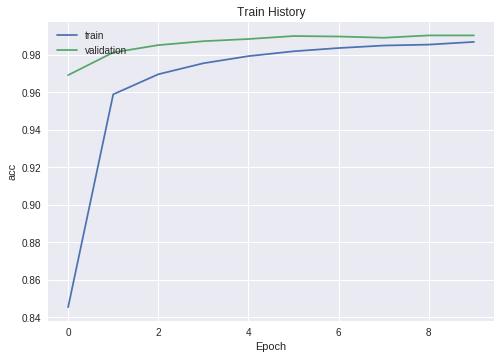

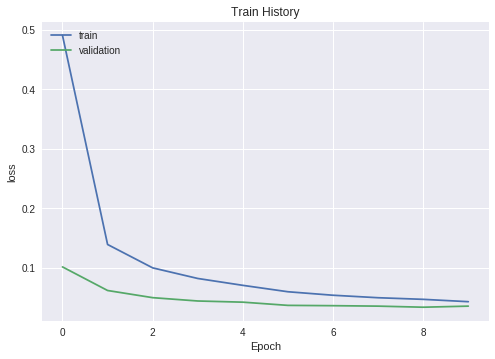

10000/10000 [==============================] - 1s 58us/step
Accuracy of testing data = 97.7%


In [58]:
model = Sequential()
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train, 
                    validation_split=0.2,  
                    batch_size=200, 
                    epochs=10,
                    verbose=2)

show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')

scores = model.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

![conv](https://4.bp.blogspot.com/-lo4ANmafiQM/WVpEeo68VPI/AAAAAAAAWxE/gVT33Q_dxqMxqZJfnbxS-fxl7ZdsntZcwCEwYBhgL/s1600/3812_1.png)

[Source] http://nbviewer.jupyter.org/github/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/2.7-mnist-recognition-cnn.ipynb

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

48000/48000 [==============================] - 73s 2ms/step - loss: 0.4320 - acc: 0.8626 - val_loss: 0.0863 - val_acc: 0.9736
Epoch 2/10
48000/48000 [==============================] - 70s 1ms/step - loss: 0.1265 - acc: 0.9613 - val_loss: 0.0566 - val_acc: 0.9831
Epoch 3/10
17200/48000 [=========>....................] - ETA: 41s - loss: 0.0912 - acc: 0.9729

48000/48000 [==============================] - 70s 1ms/step - loss: 0.0888 - acc: 0.9736 - val_loss: 0.0482 - val_acc: 0.9855
Epoch 4/10
48000/48000 [==============================] - 70s 1ms/step - loss: 0.0726 - acc: 0.9784 - val_loss: 0.0420 - val_acc: 0.9878
Epoch 5/10
18600/48000 [==========>...................] - ETA: 39s - loss: 0.0630 - acc: 0.9804

48000/48000 [==============================] - 71s 1ms/step - loss: 0.0623 - acc: 0.9806 - val_loss: 0.0399 - val_acc: 0.9874
Epoch 6/10
48000/48000 [==============================] - 71s 1ms/step - loss: 0.0547 - acc: 0.9833 - val_loss: 0.0358 - val_acc: 0.9894
Epoch 7/10
19000/48000 [==========>...................] - ETA: 38s - loss: 0.0484 - acc: 0.9857

48000/48000 [==============================] - 70s 1ms/step - loss: 0.0489 - acc: 0.9853 - val_loss: 0.0333 - val_acc: 0.9903
Epoch 8/10
48000/48000 [==============================] - 71s 1ms/step - loss: 0.0458 - acc: 0.9858 - val_loss: 0.0326 - val_acc: 0.9903
Epoch 9/10
19000/48000 [==========>...................] - ETA: 39s - loss: 0.0394 - acc: 0.9882

48000/48000 [==============================] - 71s 1ms/step - loss: 0.0387 - acc: 0.9881 - val_loss: 0.0315 - val_acc: 0.9908
Epoch 10/10
48000/48000 [==============================] - 72s 2ms/step - loss: 0.0379 - acc: 0.9880 - val_loss: 0.0303 - val_acc: 0.9912


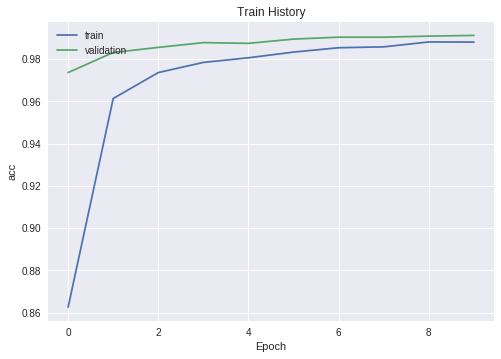

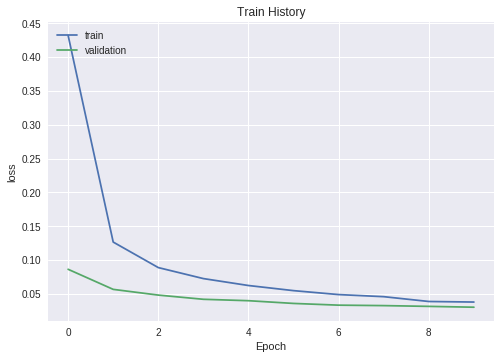

10000/10000 [==============================] - 7s 667us/step
Accuracy of testing data = 99.2%


In [59]:
from keras.layers import Dropout, Flatten, Conv2D, MaxPool2D 

(X_train, y_train), (X_test, y_test) = mnist.load_data()  
  
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')  
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

X_train = X_train / 255  
X_test = X_test /255  
  
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

model = Sequential()  
model.add(Conv2D(filters=16,  
                 kernel_size=(5, 5),  
                 padding='same',  
                 input_shape=(28, 28, 1),  
                 activation='relu',
                 name='conv2d_1')) 
model.add(MaxPool2D(pool_size=(2,2), 
                    name='max_pooling2d_1'))  
model.add(Conv2D(filters=36,  
                 kernel_size=(5, 5),  
                 padding='same',  
                 input_shape=(28, 28, 1),  
                 activation='relu',
                 name='conv2d_2'))  
model.add(MaxPool2D(pool_size=(2,2), 
                    name='max_pooling2d_2'))  
model.add(Dropout(0.25, name='dropout_1'))
model.add(Flatten(name='flatten_1'))
model.add(Dense(128, activation='relu', name='dense_1'))  
model.add(Dropout(0.5, name='dropout_2'))
model.add(Dense(10, activation='softmax', name='dense_2'))
print(model.summary())

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])  
  
history = model.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=200,
                    epochs=10, 
                    verbose=1)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

scores = model.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

## Sequential Data / Text

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 32)           96000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 101       
Total params: 149,301
Trainable params: 149,301
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.6079 - acc: 0.6839 - val_loss: 0.4370 - val_acc: 0.8262
Epoch 2/10
 1800/20000 [=>............................] - ETA: 1:08 - loss: 0.3898 - acc: 0.8367

20000/20000 [==============================] - 78s 4ms/step - loss: 0.3350 - acc: 0.8601 - val_loss: 0.3202 - val_acc: 0.8638
Epoch 3/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.2731 - acc: 0.8920 - val_loss: 0.3073 - val_acc: 0.8740
Epoch 4/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2476 - acc: 0.9042 - val_loss: 0.3145 - val_acc: 0.8696
Epoch 5/10
13400/20000 [===================>..........] - ETA: 23s - loss: 0.2305 - acc: 0.9118

20000/20000 [==============================] - 77s 4ms/step - loss: 0.2322 - acc: 0.9104 - val_loss: 0.3283 - val_acc: 0.8680
Epoch 6/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.2235 - acc: 0.9126 - val_loss: 0.3534 - val_acc: 0.8484
Epoch 7/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.2208 - acc: 0.9150 - val_loss: 0.3402 - val_acc: 0.8668
Epoch 8/10
15400/20000 [======================>.......] - ETA: 16s - loss: 0.1971 - acc: 0.9256

20000/20000 [==============================] - 76s 4ms/step - loss: 0.2051 - acc: 0.9223 - val_loss: 0.3417 - val_acc: 0.8526
Epoch 9/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.1958 - acc: 0.9253 - val_loss: 0.3535 - val_acc: 0.8636
Epoch 10/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.1885 - acc: 0.9291 - val_loss: 0.3756 - val_acc: 0.8590


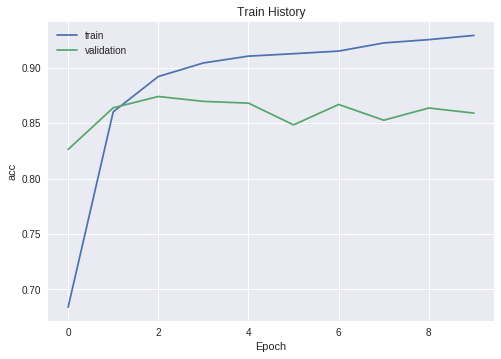

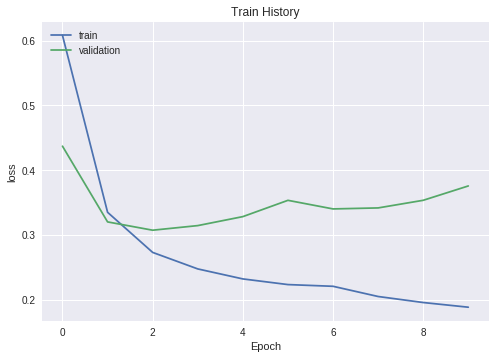

25000/25000 [==============================] - 33s 1ms/step
Accuracy of testing data = 85.9%


In [60]:
from keras.datasets import imdb
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

top_words = 3000
max_review_length = 200
embedding_vecor_length = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

history = model.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=200,
                    epochs=10, 
                    verbose=1)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

scores = model.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 32)           96000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 32)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 101       
Total para

20000/20000 [==============================] - 48s 2ms/step - loss: 0.5777 - acc: 0.6822 - val_loss: 0.3380 - val_acc: 0.8624
Epoch 2/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.3006 - acc: 0.8758 - val_loss: 0.3008 - val_acc: 0.8732
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.2531 - acc: 0.8999 - val_loss: 0.3019 - val_acc: 0.8706
Epoch 4/10
15400/20000 [======================>.......] - ETA: 9s - loss: 0.2217 - acc: 0.9145 

20000/20000 [==============================] - 45s 2ms/step - loss: 0.2242 - acc: 0.9121 - val_loss: 0.3213 - val_acc: 0.8706
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2062 - acc: 0.9212 - val_loss: 0.3577 - val_acc: 0.8652
Epoch 6/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1945 - acc: 0.9255 - val_loss: 0.3242 - val_acc: 0.8716
Epoch 7/10
15800/20000 [======================>.......] - ETA: 8s - loss: 0.1741 - acc: 0.9333

20000/20000 [==============================] - 44s 2ms/step - loss: 0.1799 - acc: 0.9303 - val_loss: 0.3254 - val_acc: 0.8686
Epoch 8/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1596 - acc: 0.9408 - val_loss: 0.3355 - val_acc: 0.8696
Epoch 9/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1507 - acc: 0.9450 - val_loss: 0.3332 - val_acc: 0.8568
Epoch 10/10
15800/20000 [======================>.......] - ETA: 8s - loss: 0.1358 - acc: 0.9535

20000/20000 [==============================] - 45s 2ms/step - loss: 0.1393 - acc: 0.9519 - val_loss: 0.4002 - val_acc: 0.8630


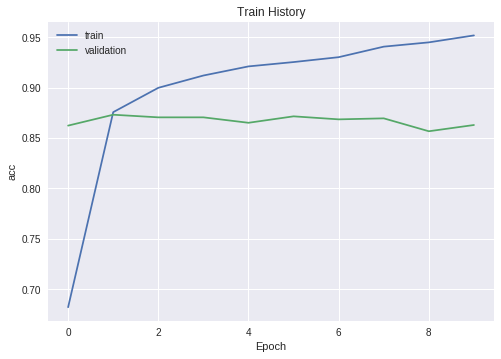

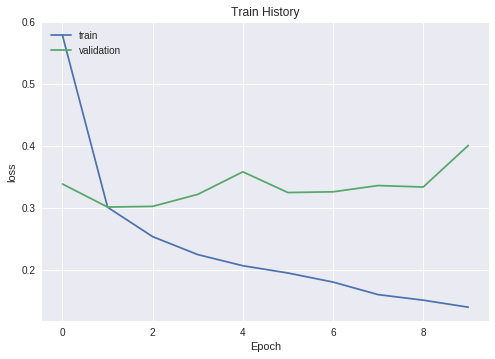

25000/25000 [==============================] - 22s 865us/step
Accuracy of testing data = 85.9%


In [61]:
from keras.layers.convolutional import Conv1D, MaxPooling1D

model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

history = model.fit(x=X_train, y=y_train,
                    validation_split=0.2,  
                    batch_size=200,
                    epochs=10, 
                    verbose=1)

show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss')

scores = model.evaluate(X_test, y_test)  
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))